In [122]:
import numpy as np
import scipy.io.wavfile as wav
from numpy.fft import fft

fs, y = wav.read("dog.wav")
freq = np.linspace(0, fs/2, len(y)//2+1)
time = len(y)/fs
t = np.linspace(0, time, len(y))
y_fft = fft(y)
y_fft = np.abs(y_fft[0:len(y)//2+1])/ 1e5
idx = np.argwhere(y_fft>threshold)
idx2 = np.argwhere(y_fft<=threshold)

<StemContainer object of 3 artists>

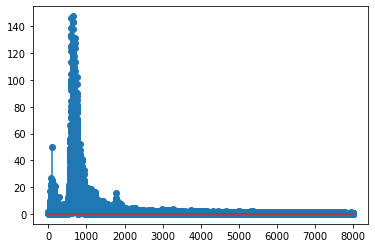

In [123]:
import matplotlib.pyplot as plt
plt.figure()
plt.stem(freq, y_fft)

In [143]:
num_sample = 500
sample_index = np.linspace(0, len(freq)-1, num_sample).astype(int)
sample_index

array([    0,    67,   134,   201,   268,   335,   402,   469,   536,
         604,   671,   738,   805,   872,   939,  1006,  1073,  1141,
        1208,  1275,  1342,  1409,  1476,  1543,  1610,  1678,  1745,
        1812,  1879,  1946,  2013,  2080,  2147,  2215,  2282,  2349,
        2416,  2483,  2550,  2617,  2684,  2752,  2819,  2886,  2953,
        3020,  3087,  3154,  3221,  3288,  3356,  3423,  3490,  3557,
        3624,  3691,  3758,  3825,  3893,  3960,  4027,  4094,  4161,
        4228,  4295,  4362,  4430,  4497,  4564,  4631,  4698,  4765,
        4832,  4899,  4967,  5034,  5101,  5168,  5235,  5302,  5369,
        5436,  5504,  5571,  5638,  5705,  5772,  5839,  5906,  5973,
        6041,  6108,  6175,  6242,  6309,  6376,  6443,  6510,  6577,
        6645,  6712,  6779,  6846,  6913,  6980,  7047,  7114,  7182,
        7249,  7316,  7383,  7450,  7517,  7584,  7651,  7719,  7786,
        7853,  7920,  7987,  8054,  8121,  8188,  8256,  8323,  8390,
        8457,  8524,

<StemContainer object of 3 artists>

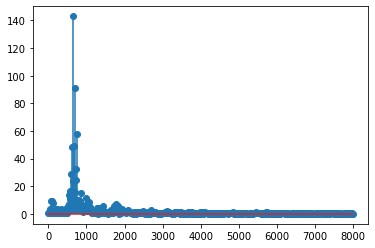

In [144]:
import matplotlib.pyplot as plt

plt.figure()
freq_new = freq[sample_index];
fft_new = y_fft[sample_index];
plt.stem(freq_new, fft_new)

In [157]:
X = freq_new.reshape(-1, 1)
threshold = 0.8;
idx = np.argwhere(fft_new > threshold)
idx2 = np.argwhere(fft_new <= threshold)
Y = np.zeros(len(fft_new))
Y[idx] = 1
Y[idx2] = 0

C:\Users\Andy\AppData\Local\Temp/ipykernel_31936/3126508910.py:2: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq_new[idx], fft_new[idx],'r')
C:\Users\Andy\AppData\Local\Temp/ipykernel_31936/3126508910.py:3: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq_new[idx2], fft_new[idx2],'b')


<StemContainer object of 3 artists>

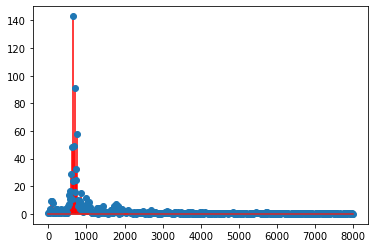

In [158]:
plt.figure()
plt.stem(freq_new[idx], fft_new[idx],'r')
plt.stem(freq_new[idx2], fft_new[idx2],'b')

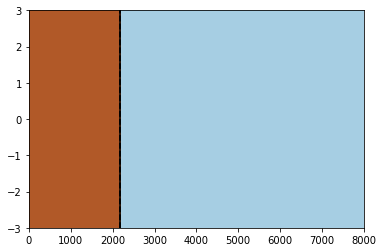

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(0)
pos = np.hstack((freq_new[idx], np.zeros((len(freq_new[idx]), 1))))
neg = np.hstack((freq_new[idx2], np.zeros((len(freq_new[idx2]), 1))))
X = np.r_[pos, neg]

clf = svm.SVC(kernel='linear')
clf.fit(X, Y)
w = clf.coef_[0]
x_0 = -clf.intercept_[0]/w[0]
margin = w[0]

plt.figure()
x_min, x_max = np.floor(X.min()), np.ceil(X.max())
y_min, y_max = -3, 3
yy = np.linspace(y_min, y_max)
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), np.zeros(XX.size)]).reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
plt.plot(x_0*np.ones(shape=yy.shape), yy, 'k-')
plt.plot(x_0*np.ones(shape=yy.shape) - margin, yy, 'k--')
plt.plot(x_0*np.ones(shape=yy.shape) + margin, yy, 'k--')
plt.scatter(pos, np.zeros(shape=pos.shape), s=80, marker='o', facecolors='none')
plt.scatter(neg, np.zeros(shape=neg.shape), s=80, marker='^', facecolors='none')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()